In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import LoadData

In [3]:
experimets = LoadData.LoadData()

In [4]:
data = experimets.build_data_frame()

In [5]:
data.head()

016                                                      024  \
            h1        h2        h3   v1   v2   v3     u error        h1   
0.00 -0.210234  0.196481  0.283025  0.0  0.0  0.0  0.75   0.0  0.067978   
0.01 -0.193258  0.196481  0.283025  0.0  0.0  0.0  0.75   0.0  0.067978   
0.02 -0.193258  0.196481  0.283025  0.0  0.0  0.0  0.75   0.0  0.051098   
0.03 -0.210234  0.212842  0.316016  0.0  0.0  0.0  0.75   0.0  0.084858   
0.04 -0.193258  0.212842  0.299521  0.0  0.0  0.0  0.75   0.0  0.067978   

                ...    006             017                                     \
            h2  ...      u error        h1        h2        h3   v1   v2   v3   
0.00  0.249826  ...   0.75   0.0 -0.088510  0.317041 -0.149877  0.0  0.0  0.0   
0.01  0.249826  ...   0.75   0.0 -0.088510  0.333374 -0.166474  0.0  0.0  0.0   
0.02  0.249826  ...   0.75   0.0 -0.071636  0.349706 -0.149877  0.0  0.0  0.0   
0.03  0.266230  ...   0.75   0.0 -0.071636  0.333374 -0.149877  0.0  0.0  0.0   
0.04  0.282634  ...   0.75   0.0 -0.088510  0.317041 -0.149877  0.0  0.0  0.0   

                  
         u error  
0.00  0.65   0.0  
0.01  0.65   0.0  
0.02  0.65   0.0  
0.03  0.65   0.0  
0.04  0.65   0.0  

[5 rows x 176 columns]

In [6]:
exp_number = '023'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98c6cc7f0>,
      dtype=object)

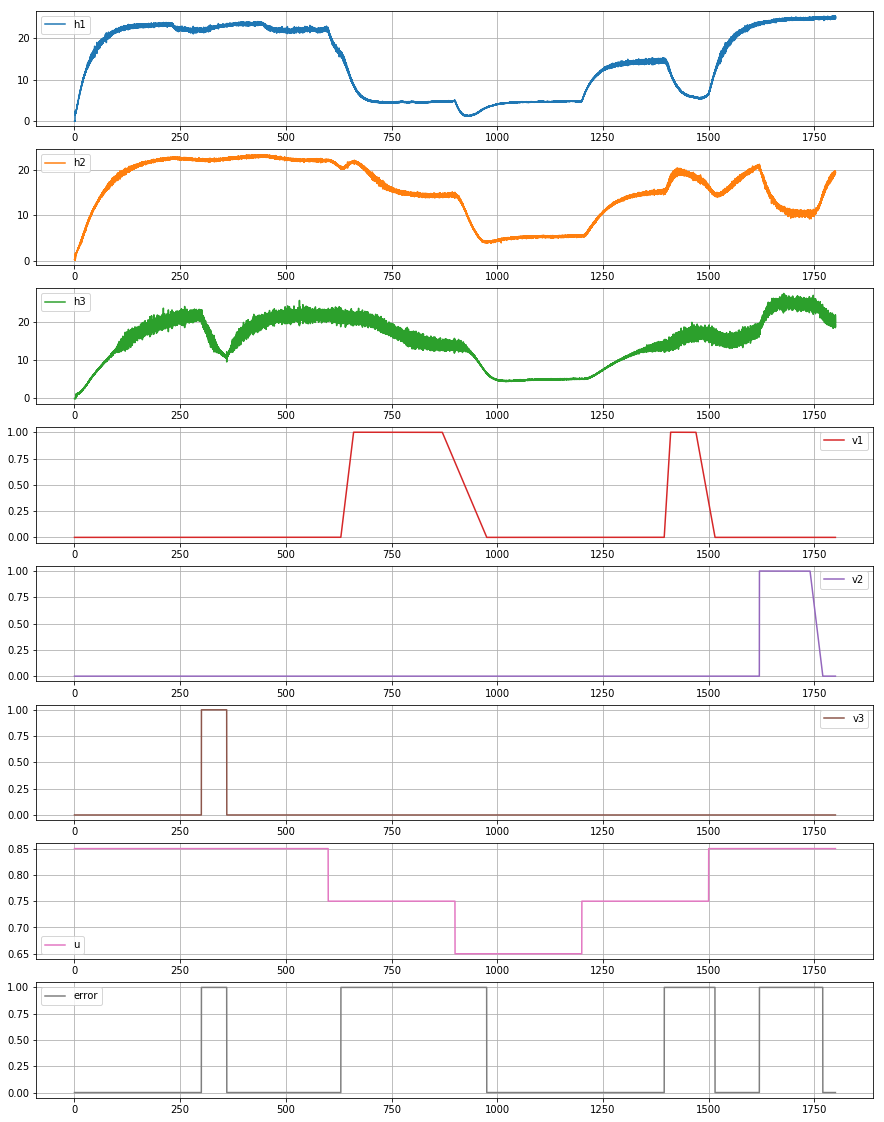

In [7]:
plt.figure()
data[exp_number].plot(subplots=True, figsize=(15,20), grid=True, sharex=False, legend=True)


In [8]:
features = ['h1', 'h2', 'h3']
control = ['v1', 'v2', 'v3', 'u']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb983dfeb70>,
      dtype=object)

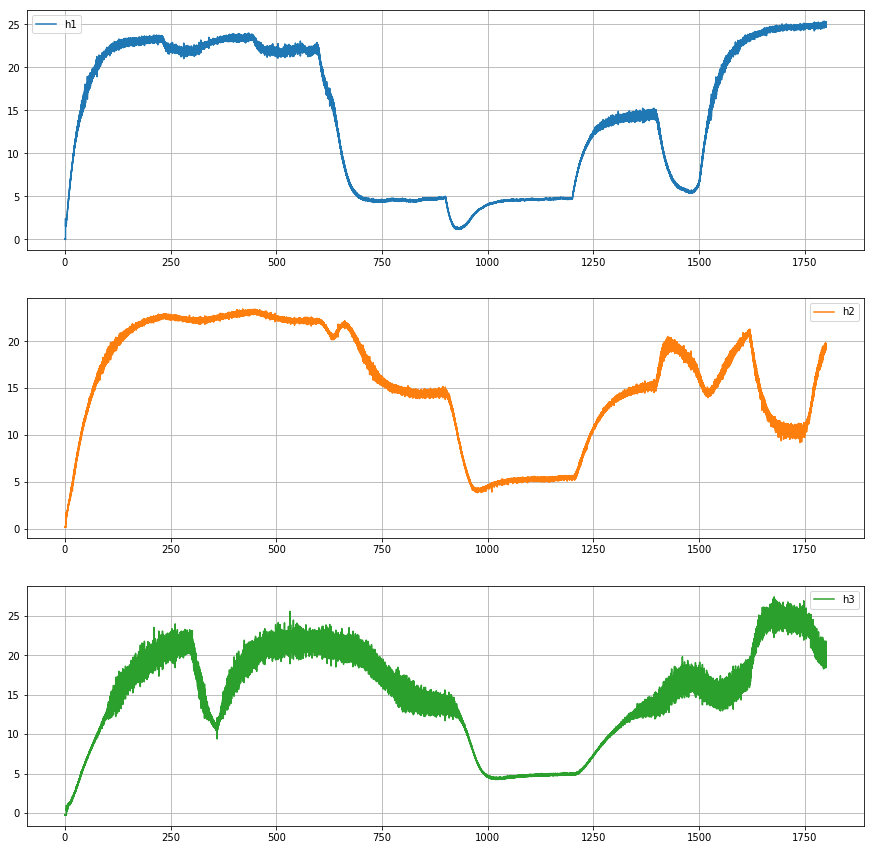

In [9]:
data[exp_number][features].plot(subplots=True, figsize=(15,15), grid=True, sharex=False, legend=True)

In [11]:
window_size = 10000
h1_roll = data[exp_number]['h1'].rolling(window=window_size)
h2_roll = data[exp_number]['h2'].rolling(window=window_size)
h3_roll = data[exp_number]['h3'].rolling(window=window_size)
#make new features
#correlations between heights
cor12 = h1_roll.corr(h2_roll)
cor13 = h1_roll.corr(h3_roll)
cor23 = h2_roll.corr(h3_roll)
#means
m1 = h1_roll.mean()
m2 = h2_roll.mean()
m3 = h3_roll.mean()
#auto covariance
auto_cov1 = h1_roll.cov(h1_roll)
auto_cov2 = h2_roll.cov(h2_roll)
auto_cov3 = h3_roll.cov(h3_roll)


In [ ]:
from scipy.stats import mode
mode_h1 = h1_roll.apply(lambda x: mode(x)[0][0])
mode_h2 = h2_roll.apply(lambda x: mode(x)[0][0])
mode_h3 = h3_roll.apply(lambda x: mode(x)[0][0])

In [13]:
v1 = data[exp_number]['v1']
v2 = data[exp_number]['v2']
v3 = data[exp_number]['v3']
u = data[exp_number]['u']
data_merged = np.array([cor12, cor13, cor23, m1, m2, m3, auto_cov1, auto_cov2, auto_cov3, mode_h1, v1, v2, v3, u])
columns = ['cor12', 'cor13', 'cor23', 'm1', 'm2', 'm3', 'auto_cov1', 'auto_cov2', 'auto_cov3', 'mode_h1']
columns.extend(control)
df_merged = pd.DataFrame(data_merged.T, columns=columns).dropna()
# df_merged = df_merged.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb981961748>,
      dtype=object)

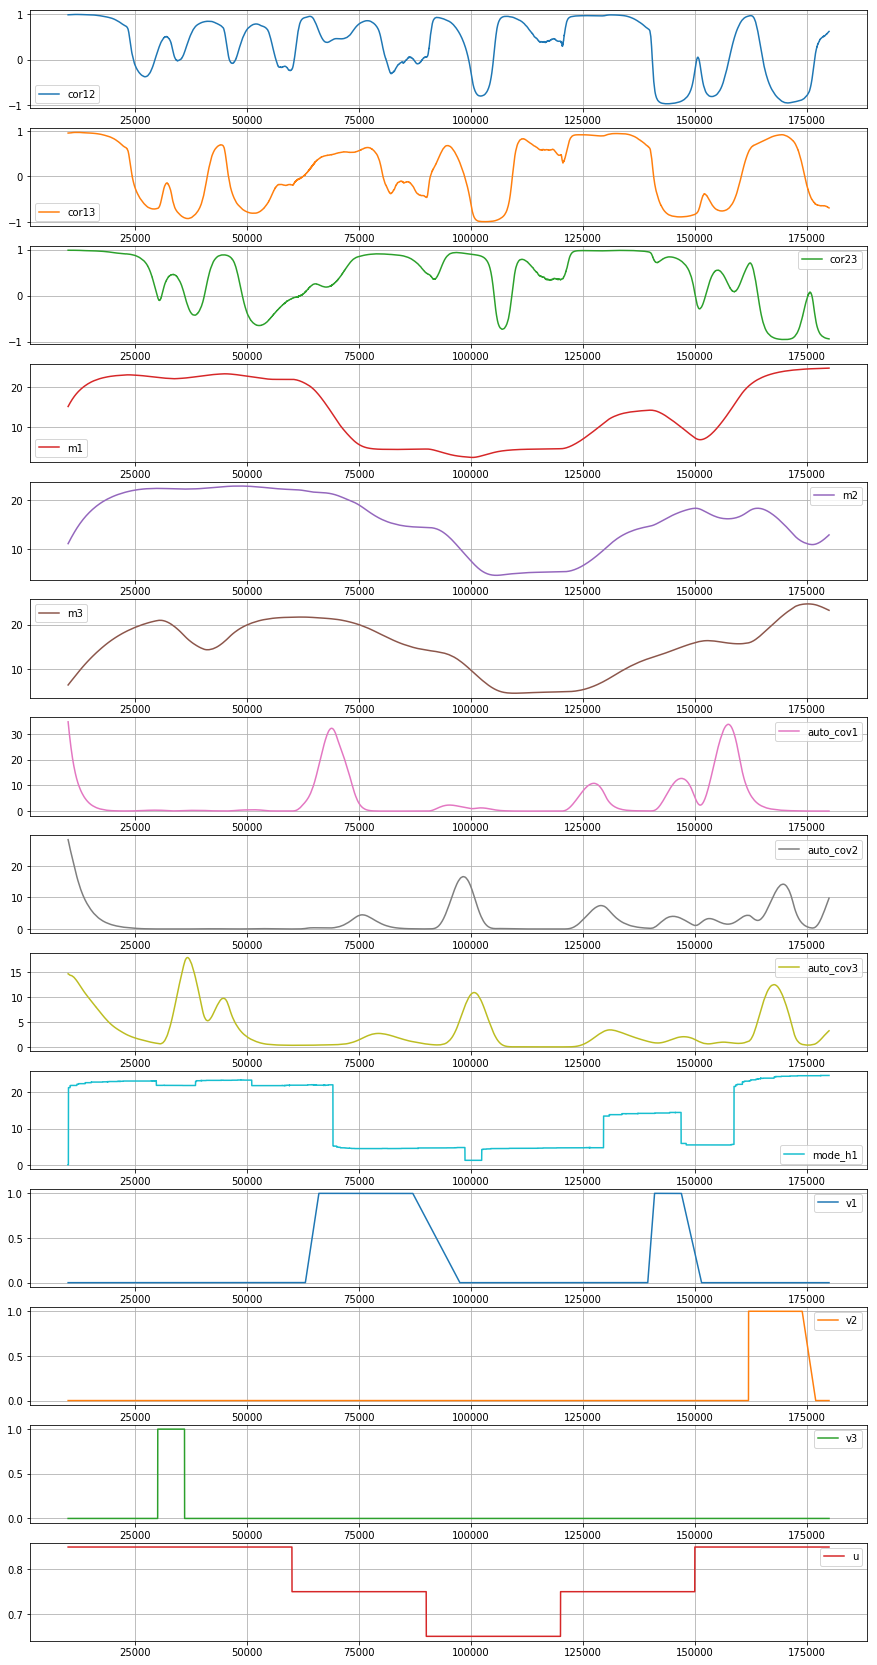

In [14]:
df_merged.plot(subplots=True, figsize=(15,30), grid=True, sharex=False, legend=True)